A1

Can the model accurately predict future negative and positive reviews?

A2

The objective is to build a neural network model to train and test a dataset to predict new data

A3

TensorFlow and Kera libraries are capable of performing text classification, the type of neural network that performs this task is a recurrent neural network (RNN).

B1

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
amazon = open('amazon_cells_labelled.txt').read()

a_labels, a_texts = [],[]
for i, line in enumerate(amazon.split('\n')):
    content = line.split('\t')
    if len(content) > 1:
        a_texts.append(content[0])
        a_labels.append(content[1])
        
df_a = pd.DataFrame()
df_a['label'] = a_labels
df_a['text'] = a_texts
df_a['source'] = 'amazon'

imdb = open('imdb_labelled.txt').read()

i_labels, i_texts = [],[]
for i, line in enumerate(imdb.split('\n')):
    content = line.split('\t')
    if len(content) > 1:
        i_texts.append(content[0])
        i_labels.append(content[1])
        
df_i = pd.DataFrame()
df_i['label'] = i_labels
df_i['text'] = i_texts
df_i['source'] = 'imdb'

yelp = open('yelp_labelled.txt').read()

y_labels, y_texts = [],[]
for i, line in enumerate(yelp.split('\n')):
    content = line.split('\t')
    if len(content) > 1:
        y_texts.append(content[0])
        y_labels.append(content[1])
        
df_y = pd.DataFrame()
df_y['label'] = y_labels
df_y['text'] = y_texts
df_y['source'] = 'yelp'

In [3]:
display(df_a.head())
display(df_a.shape)
display(df_i.head())
display(df_i.shape)
display(df_y.head())
display(df_y.shape)

,label,text,source
0,0,So there is no way for me to plug it in here i...,amazon
1,1,"Good case, Excellent value.",amazon
2,1,Great for the jawbone.,amazon
3,0,Tied to charger for conversations lasting more...,amazon
4,1,The mic is great.,amazon


(1000, 3)

,label,text,source
0,0,"A very, very, very slow-moving, aimless movie ...",imdb
1,0,Not sure who was more lost - the flat characte...,imdb
2,0,Attempting artiness with black & white and cle...,imdb
3,0,Very little music or anything to speak of.,imdb
4,1,The best scene in the movie was when Gerardo i...,imdb


(1000, 3)

,label,text,source
0,1,Wow... Loved this place.,yelp
1,0,Crust is not good.,yelp
2,0,Not tasty and the texture was just nasty.,yelp
3,1,Stopped by during the late May bank holiday of...,yelp
4,1,The selection on the menu was great and so wer...,yelp


(1000, 3)

In [4]:
df = pd.concat([df_a, df_i, df_y], ignore_index=True)
df.label = df.label.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   3000 non-null   int32 
 1   text    3000 non-null   object
 2   source  3000 non-null   object
dtypes: int32(1), object(2)
memory usage: 58.7+ KB


In [5]:
df

,label,text,source
0,0,So there is no way for me to plug it in here i...,amazon
1,1,"Good case, Excellent value.",amazon
2,1,Great for the jawbone.,amazon
3,0,Tied to charger for conversations lasting more...,amazon
4,1,The mic is great.,amazon
...,...,...,...
2995,0,I think food should have flavor and texture an...,yelp
2996,0,Appetite instantly gone.,yelp
2997,0,Overall I was not impressed and would not go b...,yelp
2998,0,"The whole experience was underwhelming, and I ...",yelp


In [6]:
import string
df['chars'] = df.text.apply(len)
df['words'] = df.text.apply(lambda x: len(x.split()))
df['avg_wlen'] = df['chars']/ df['words']
df['puncs'] = df.text.apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation)))
df['uppers'] = df.text.apply(lambda x: len([word for word in x.split() if word.isupper]))
df['titles'] = df.text.apply(lambda x: len([word for word in x.split() if word.istitle]))
df.head()

,label,text,source,chars,words,avg_wlen,puncs,uppers,titles
0,0,So there is no way for me to plug it in here i...,amazon,82,21,3.904762,1,21,21
1,1,"Good case, Excellent value.",amazon,27,4,6.750000,2,4,4
2,1,Great for the jawbone.,amazon,22,4,5.500000,1,4,4
3,0,Tied to charger for conversations lasting more...,amazon,79,11,7.181818,3,11,11
4,1,The mic is great.,amazon,17,4,4.250000,1,4,4


In [7]:
df['text'].str.len()

0        82
1        27
2        22
3        79
4        17
       ... 
2995     66
2996     24
2997     50
2998     91
2999    134
Name: text, Length: 3000, dtype: int64

In [8]:
df['text'].value_counts()

The food was terrible.                                                                                         2
Don't buy this product.                                                                                        2
If you like a loud buzzing to override all your conversations, then this phone is for you!                     2
Not recommended.                                                                                               2
I would not recommend this place.                                                                              2
                                                                                                              ..
" But "Storm Trooper" is not even bad enough to make it to the list of wonderfully terrible movies.            1
What happened next was pretty....off putting.                                                                  1
The headsets are easy to use and everyone loves them.                                           

In [9]:
df['text'].unique()

array(['So there is no way for me to plug it in here in the US unless I go by a converter.',
       'Good case, Excellent value.', 'Great for the jawbone.', ...,
       'Overall I was not impressed and would not go back.',
       "The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.",
       "Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check."],
      dtype=object)

In [10]:
print(min(df['text'].str.len()))
print(max(df['text'].str.len()))

7
479


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
count_vectorize = CountVectorizer()

In [13]:
feature_vector_df = count_vectorize.fit(df.text)

In [14]:
features_df = feature_vector_df.get_feature_names()

In [15]:
print('df total number of unique words:', len(features_df))

df total number of unique words: 5159


In [16]:
import random

In [17]:
random.sample(features_df, 10)

['venture',
 'interest',
 'half',
 'key',
 'elias',
 'eating',
 'fifteen',
 'considerable',
 'tolerable',
 'monolog']

In [18]:
feature_vector_df_transform = count_vectorize.transform(df.text)

In [19]:
type(feature_vector_df_transform)

scipy.sparse.csr.csr_matrix

In [20]:
feature_vector_df_transform.getnnz()

31580

In [21]:
print("Density of the matrix: ", feature_vector_df_transform.getnnz()*100/(feature_vector_df_transform.shape[0]*feature_vector_df_transform.shape[1]))

Density of the matrix:  0.20404471150739809


In [22]:
train_df = pd.DataFrame(feature_vector_df_transform.todense())

In [23]:
train_df.columns = features_df

In [24]:
train_df[0:1]

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df.text[0:1]

0    So there is no way for me to plug it in here i...
Name: text, dtype: object

In [26]:
features_count = np.sum(feature_vector_df_transform.toarray(), axis=0)

In [27]:
features_count_df = pd.DataFrame(dict(features_df=features_df, counts= features_count))

(array([5.112e+03, 2.700e+01, 8.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <BarContainer object of 10 artists>)

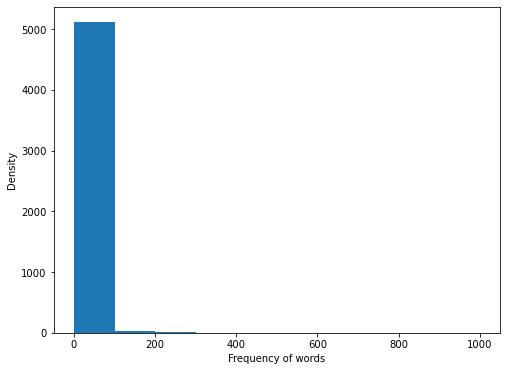

In [28]:
plt.figure(figsize=(8,6))
plt.xlabel('Frequency of words')
plt.ylabel('Density')
plt.hist(features_count_df.counts, bins=10, range=(0,1000))

In [29]:
len(features_count_df[features_count_df.counts==1])

2922

In [30]:
count_vectorizer = CountVectorizer(max_features=3000)
feature_vector = count_vectorizer.fit(df.text)
features = feature_vector.get_feature_names()
train_ds_features = count_vectorizer.transform(df.text)
features_counts = np.sum(train_ds_features.toarray(),axis=0)
features_counts = pd.DataFrame(dict(features= features, counts = features_counts))
features_counts.sort_values('counts', ascending=False)[0:15]

,features,counts
2377,the,1953
85,and,1138
1036,it,789
1033,is,753
2455,to,670
2404,this,643
1334,of,624
2814,was,571
1005,in,400
801,for,336


In [31]:
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS
print('few stop words:', list(my_stop_words)[0:400])

few stop words: ['but', 'couldnt', 'whence', 'top', 'or', 'to', 'already', 'indeed', 'some', 'their', 'than', 'thick', 'nine', 'i', 'them', 'myself', 'any', 'thus', 'down', 'alone', 'whereupon', 'beforehand', 'themselves', 'an', 'other', 'by', 'six', 'rather', 'amongst', 'two', 'almost', 'keep', 'whose', 'between', 'throughout', 'seemed', 'meanwhile', 'here', 'nevertheless', 'nobody', 'sometime', 'she', 'anyway', 'forty', 'itself', 'whereafter', 'done', 'thin', 'even', 'eg', 'anyhow', 'see', 'sixty', 'either', 'though', 'no', 'via', 'one', 'least', 'where', 'yours', 'across', 'this', 'sometimes', 'such', 'has', 'due', 'three', 'un', 'then', 'bottom', 'with', 'ltd', 'latter', 'fill', 'beyond', 'may', 'because', 'as', 'twenty', 'cannot', 'too', 'do', 'have', 'yet', 'noone', 'etc', 'against', 'same', 'whoever', 'enough', 'latterly', 'became', 'together', 'for', 'which', 'after', 'if', 'made', 'you', 'can', 'side', 're', 'eight', 'what', 'thru', 'will', 'himself', 'is', 'a', 'co', 'under',

<AxesSubplot:xlabel='label', ylabel='awesome'>

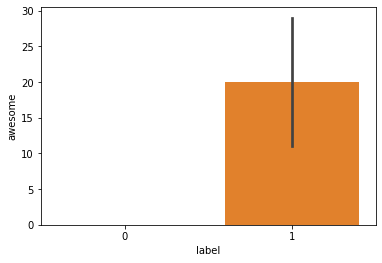

In [32]:
train_df = pd.DataFrame(train_ds_features.todense())
train_df.columns=features
train_df['label']=df.label
sns.barplot(x='label',y='awesome',data=train_df, estimator=sum)

<AxesSubplot:xlabel='label', ylabel='hate'>

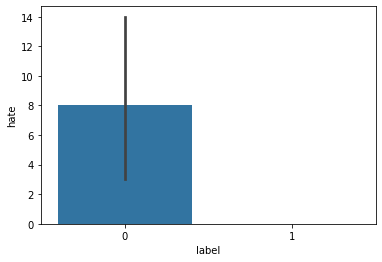

In [33]:
train_df = pd.DataFrame(train_ds_features.todense())
train_df.columns=features
train_df['label']=df.label
sns.barplot(x='label',y='hate',data=train_df, estimator=sum)

In [34]:
df

,label,text,source,chars,words,avg_wlen,puncs,uppers,titles
0,0,So there is no way for me to plug it in here i...,amazon,82,21,3.904762,1,21,21
1,1,"Good case, Excellent value.",amazon,27,4,6.750000,2,4,4
2,1,Great for the jawbone.,amazon,22,4,5.500000,1,4,4
3,0,Tied to charger for conversations lasting more...,amazon,79,11,7.181818,3,11,11
4,1,The mic is great.,amazon,17,4,4.250000,1,4,4
...,...,...,...,...,...,...,...,...,...
2995,0,I think food should have flavor and texture an...,yelp,66,12,5.500000,1,12,12
2996,0,Appetite instantly gone.,yelp,24,3,8.000000,1,3,3
2997,0,Overall I was not impressed and would not go b...,yelp,50,10,5.000000,1,10,10
2998,0,"The whole experience was underwhelming, and I ...",yelp,91,16,5.687500,3,16,16


In [35]:
display(df.groupby(['source', 'label']).describe().loc[:,(slice(None),['mean', 'std'])].reset_index())
display(df.groupby(['source', 'label']).describe().loc[:,(slice(None),['min', 'max'])].reset_index())

source label   chars              words             avg_wlen            \
                   mean        std    mean        std      mean       std   
0  amazon     0  56.824  34.022464  10.578   6.578028  5.653474  1.262250   
1  amazon     1  53.628  35.234764   9.914   6.785772  5.670933  1.113802   
2    imdb     0  77.104  50.901504  13.580   9.037863  5.814498  0.941015   
3    imdb     1  87.466  60.831157  15.128  10.102859  5.826946  0.992992   
4    yelp     0  60.752  34.226443  11.498   6.611916  5.401394  0.896878   
5    yelp     1  55.888  30.232490  10.290   5.831459  5.606887  0.951414   

   puncs            uppers             titles             
    mean       std    mean        std    mean        std  
0  2.002  1.509488  10.578   6.578028  10.578   6.578028  
1  1.842  1.296301   9.914   6.785772   9.914   6.785772  
2  2.494  1.954893  13.580   9.037863  13.580   9.037863  
3  2.650  2.282525  15.128  10.102859  15.128  10.102859  
4  2.000  1.424098  11.498   6.611916  11.498   6.611916  
5  1.930  1.658494  10.290   5.831459  10.290   5.831459

source label chars        words        avg_wlen       puncs       uppers  \
                  min    max   min   max       min   max   min   max    min   
0  amazon     0  11.0  149.0   1.0  30.0  3.857143  14.0   0.0  11.0    1.0   
1  amazon     1  11.0  148.0   1.0  30.0  3.166667  13.0   0.0   9.0    1.0   
2    imdb     0   8.0  321.0   1.0  56.0  4.181818  11.5   1.0  14.0    1.0   
3    imdb     1   7.0  479.0   1.0  71.0  3.200000  12.0   0.0  18.0    1.0   
4    yelp     0  11.0  149.0   2.0  32.0  3.666667  12.5   0.0  11.0    2.0   
5    yelp     1  11.0  148.0   1.0  32.0  3.666667  11.0   0.0  19.0    1.0   

        titles        
    max    min   max  
0  30.0    1.0  30.0  
1  30.0    1.0  30.0  
2  56.0    1.0  56.0  
3  71.0    1.0  71.0  
4  32.0    2.0  32.0  
5  32.0    1.0  32.0

In [36]:
df

,label,text,source,chars,words,avg_wlen,puncs,uppers,titles
0,0,So there is no way for me to plug it in here i...,amazon,82,21,3.904762,1,21,21
1,1,"Good case, Excellent value.",amazon,27,4,6.750000,2,4,4
2,1,Great for the jawbone.,amazon,22,4,5.500000,1,4,4
3,0,Tied to charger for conversations lasting more...,amazon,79,11,7.181818,3,11,11
4,1,The mic is great.,amazon,17,4,4.250000,1,4,4
...,...,...,...,...,...,...,...,...,...
2995,0,I think food should have flavor and texture an...,yelp,66,12,5.500000,1,12,12
2996,0,Appetite instantly gone.,yelp,24,3,8.000000,1,3,3
2997,0,Overall I was not impressed and would not go b...,yelp,50,10,5.000000,1,10,10
2998,0,"The whole experience was underwhelming, and I ...",yelp,91,16,5.687500,3,16,16


B2

The goal for tokenization is to prepare the text data for machine learning. It can clean the text by removing stopwords, puncutations. it characterizes words to a unique token to be classified by splitting the sentence into indiviual words.

In [37]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

i=0
df['clean_text'] = ''
for row in df.text:
    row = row.replace('.','. ', row.count('.')).replace(',', ', ', row.count(','))
    tokens = word_tokenize(row)
    tokens = [token.lower() for token in tokens]
    table = str.maketrans('', '', string.punctuation)
    words = [token.translate(table) for token in tokens]
    words = [word for word in words if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]
    df['clean_text'][i] = ' '.join(words)
    i += 1
df.clean_text = df.source + ' ' + df.clean_text
df.head()

<ipython-input-37-46564b2a546f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'][i] = ' '.join(words)


,label,text,source,chars,words,avg_wlen,puncs,uppers,titles,clean_text
0,0,So there is no way for me to plug it in here i...,amazon,82,21,3.904762,1,21,21,amazon way plug us unless go converter
1,1,"Good case, Excellent value.",amazon,27,4,6.750000,2,4,4,amazon good case excellent value
2,1,Great for the jawbone.,amazon,22,4,5.500000,1,4,4,amazon great jawbone
3,0,Tied to charger for conversations lasting more...,amazon,79,11,7.181818,3,11,11,amazon tied charger conversations lasting 45 m...
4,1,The mic is great.,amazon,17,4,4.250000,1,4,4,amazon mic great


In [38]:
df['clean_words'] = df.clean_text.apply(lambda x: len(x.split()))

In [39]:
df.head()

,label,text,source,chars,words,avg_wlen,puncs,uppers,titles,clean_text,clean_words
0,0,So there is no way for me to plug it in here i...,amazon,82,21,3.904762,1,21,21,amazon way plug us unless go converter,7
1,1,"Good case, Excellent value.",amazon,27,4,6.750000,2,4,4,amazon good case excellent value,5
2,1,Great for the jawbone.,amazon,22,4,5.500000,1,4,4,amazon great jawbone,3
3,0,Tied to charger for conversations lasting more...,amazon,79,11,7.181818,3,11,11,amazon tied charger conversations lasting 45 m...,9
4,1,The mic is great.,amazon,17,4,4.250000,1,4,4,amazon mic great,3


In [40]:
print(min(df['clean_words']))
print(max(df['clean_words']))

2
42


B3

The padding process works by setting a max length of words and any words short of  the max word length will get additional zeroes in place to meet the max length. Any sentence over the max will get words droppped to meet the max as well. This is neccessary for NLP to work by having the same inputs.

In [41]:
#import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=50)
sequences=tokenizer.texts_to_sequences(df.text)
padded=pad_sequences(sequences, padding="pre",truncating='pre',maxlen=42)

In [42]:
# split dataset
from sklearn import model_selection
from sklearn import preprocessing

# train-test split
x_train, x_test, y_train, y_test = model_selection.train_test_split(df.clean_text, df.label) 

# label encode the target 
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

# count vector
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}') 
count_vect.fit(df.clean_text) # regexp selects tokens of 1 or more alphanumeric characters

xall_count = count_vect.transform(df.clean_text)
xtrain_count = count_vect.transform(x_train)
xtest_count = count_vect.transform(x_test)

# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

# word-level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df.clean_text)
xtrain_tfidf = tfidf_vect.transform(x_train)
xtest_tfidf = tfidf_vect.transform(x_test)

# ngram-level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2, 3), max_features=5000)
tfidf_vect_ngram.fit(df.clean_text) # measures bi-grams and tri-grams
xtrain_tfidf_ngram = tfidf_vect_ngram.transform(x_train)
xtest_tfidf_ngram = tfidf_vect_ngram.transform(x_test)

# Latent Dirichlet Allocation model (with online variational Bayes algorithm)
from sklearn import decomposition

lda_model = decomposition.LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=100)
lda_fit = lda_model.fit_transform(xall_count)
topics = lda_model.components_ 
vocab = count_vect.get_feature_names()

# top keywords for each topic
n_words = 10
vocab = count_vect.get_feature_names()
keywords = np.array(vocab)
topic_keywords = []
for topic_weights in topics:
    top_keyword_locs = (-topic_weights).argsort()[:n_words]
    topic_keywords.append(keywords.take(top_keyword_locs))
df_topic_kw = pd.DataFrame(topic_keywords)
df_topic_kw.columns = ['Word '+str(i) for i in range(df_topic_kw.shape[1])]
df_topic_kw.index = ['Topic '+str(i) for i in range(df_topic_kw.shape[0])]
df_topic_kw

# dominant topic for each matrix
topic_names = ['Topic ' + str(i) for i in range(lda_model.n_components)]
df_doctop = pd.DataFrame(np.round(lda_fit, 2), columns=topic_names, index=df.index)
dominant_topic = np.argmax(df_doctop.values, axis=1)
df_doctop['dominant_topic'] = dominant_topic 
df_doctop['source'] = df.source
df_doctop['label'] = df.label
df_doctop.head(10)

# plot the dominant topic
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

df_doctop.groupby(['dominant_topic', 'source'])['source'].count().unstack().\
    plot(kind='bar', figsize=(15, 8), fontsize=14, ax=ax, cmap=plt.cm.get_cmap('Accent'))
ax.set_title('Document Dominant Topics by Source', fontsize=18)
ax.set_xlabel('Dominant Topic', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
ax.legend(fontsize=14);

# plot the dominant topic
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

df_doctop.groupby(['source', 'label'])['source'].count().unstack().\
    plot(kind='bar', figsize=(15, 8), fontsize=14, ax=ax, cmap=plt.cm.get_cmap('Accent'))
ax.set_title('Document Dominant Topics by Source', fontsize=18)
ax.set_xlabel('Dominant Topic', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
ax.legend(fontsize=14);

# model wrapper function
from sklearn import metrics

def train_model(classifier, train_features, label, test_features):
    # fit the training data on classifier
    classifier.fit(train_features, label)
    
    # predict testing data labels
    predictions = classifier.predict(test_features)
    
    return metrics.accuracy_score(predictions, y_test)

# Naive Bayes
from sklearn import naive_bayes

# Count Vectors
nb_cv = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count)
print("[Naive Bayes] Count Vectors Accuracy:", round(nb_cv, 3))

# Word-Level TF-IDF Vectors
nb_wl = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, y_train, xtest_tfidf)
print("[Naive Bayes] Word-Level TF-IDF Accuracy:", round(nb_wl, 3))

# Ngram-Level TF-IDF Vectors
nb_nl = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("[Naive Bayes] N-Gram-Level TF-IDF Accuracy:", round(nb_nl, 3))

# Logistic Regression
from sklearn import linear_model

# Count Vectors
lr_cv = train_model(linear_model.LogisticRegression(), xtrain_count, y_train, xtest_count)
print("[Logistic Regression] Count Vectors Accuracy:", round(lr_cv, 3))

# Word-Level TF-IDF Vectors
lr_wl = train_model(linear_model.LogisticRegression(), xtrain_tfidf, y_train, xtest_tfidf)
print("[Logistic Regression] Word-Level TF-IDF Accuracy:", round(lr_wl, 3))

# Ngram-Level TF-IDF Vectors
lr_nl = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("[Logistic Regression] N-Gram TF-IDF Accuracy:", round(lr_nl, 3))

# Support Vector Machines
from sklearn import svm

# Count Vectors
svm_cv = train_model(svm.SVC(), xtrain_count, y_train, xtest_count)
print("[Support Vector Machines] Count Vectors Accuracy:", round(svm_cv, 3))

# Word-Level TF-IDF Vectors
svm_wl = train_model(svm.SVC(), xtrain_tfidf, y_train, xtest_tfidf)
print("[Support Vector Machines] Word-Level TF-IDF Accuracy:", round(svm_wl, 3))

# Ngram-Level TF-IDF Vectors
svm_nl = train_model(svm.SVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("[Support Vector Machines] N-Gram TF-IDF Accuracy:", round(svm_nl, 3))

# Random Forest
from sklearn import ensemble

# Count Vectors
rf_cv = train_model(ensemble.RandomForestClassifier(), xtrain_count, y_train, xtest_count)
print("[Random Forest] Count Vectors Accuracy:", round(rf_cv, 3))

# Word-Level TF-IDF Vectors
rf_wl = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, y_train, xtest_tfidf)
print("[Random Forest] Word-Level TF-IDF Accuracy:", round(rf_wl, 3))

# Ngram-Level TF-IDF Vectors
rf_nl = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("[Random Forest] N-Gram TF-IDF Accuracy:", round(rf_nl, 3))

# model performance table
pd.DataFrame([[nb_cv, nb_wl, nb_nl],
              [lr_cv, lr_wl, lr_nl],
              [svm_cv, svm_wl, svm_nl],
              [rf_cv, rf_wl, rf_nl]],             
columns=['Count Vector', 'Word TF-IDF', 'n-Gram TF-IDF'], 
index=['Naive Bayes', 'Logistic Regression', 'Support Vector Machines', 'Random Forest']).round(3)

In [43]:
tokenizer.fit_on_texts(df.clean_text)
word_index= tokenizer.word_index
#print(word_index)

In [44]:
test_data = [
    'i really love this product',
    'waste of money it does not work'
]
test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)

[[16, 28, 30], [32]]


In [45]:
sequences = tokenizer.texts_to_sequences(df.clean_text)

In [46]:
padded = pad_sequences(sequences, padding = 'post', truncating= 'post', maxlen=42)
#print(word_index)
#print(sequences)
#print(padded)

In [47]:
print(padded[1,:])

[ 1  5 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [48]:
print(padded[2,:])

[1 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [49]:
# split dataset
from sklearn import model_selection
from sklearn import preprocessing

# train-test split
x_train, x_test, y_train, y_test = model_selection.train_test_split(df.clean_text, df.label) 


In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5120, 64, input_length=42),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model = keras.Sequential()
model.add(keras.layers.Embedding(10000,16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

C3. # review video on how to explain hyperparameters in video tensorflow linear regression video

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 42, 64)            327680    
                                                                 
 flatten (Flatten)           (None, 2688)              0         
                                                                 
 dense (Dense)               (None, 6)                 16134     
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 343,821
Trainable params: 343,821
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], run_eagerly=True)

In [53]:
x_val= x_train[:5120]
x_train=x_train[5120:]
y_val=y_train[:5120]
y_train=y_train[5120:]

In [54]:
fitmodel= model.fit(x_train, y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)

Epoch 1/40


ValueError: Unexpected result of `train_function` (Empty logs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.